In [1]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import time
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 4000

# Set a consistent style for plots
sns.set(style="whitegrid")

In [2]:
df = pd.read_csv(r"online_shoppers_intention.csv")

In [3]:
df.head()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Administrative           12330 non-null  int64  
 1   Administrative_Duration  12330 non-null  float64
 2   Informational            12330 non-null  int64  
 3   Informational_Duration   12330 non-null  float64
 4   ProductRelated           12330 non-null  int64  
 5   ProductRelated_Duration  12330 non-null  float64
 6   BounceRates              12330 non-null  float64
 7   ExitRates                12330 non-null  float64
 8   PageValues               12330 non-null  float64
 9   SpecialDay               12330 non-null  float64
 10  Month                    12330 non-null  object 
 11  OperatingSystems         12330 non-null  int64  
 12  Browser                  12330 non-null  int64  
 13  Region                   12330 non-null  int64  
 14  TrafficType           

In [5]:
df["Weekend"] = df["Weekend"].astype(int)
df["Revenue"] = df["Revenue"].astype(int)

In [6]:
# Identify duplicates (across all columns)
duplicates = df[df.duplicated()]

# Print duplicates
duplicates

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
158,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,1,1,1,3,Returning_Visitor,0,0
159,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,0,0
178,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Feb,3,2,3,3,Returning_Visitor,0,0
418,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,1,1,1,1,Returning_Visitor,1,0
456,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,4,1,Returning_Visitor,0,0
483,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,3,2,3,1,Returning_Visitor,0,0
512,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,0,0
540,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,3,2,3,1,Returning_Visitor,0,0
554,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,0,0
589,0,0.0,0,0.0,1,0.0,0.2,0.2,0.0,0.0,Mar,2,2,1,1,Returning_Visitor,0,0


In [7]:
print("Number of duplicates:", len(duplicates))

Number of duplicates: 125


In [8]:
df = df.drop_duplicates()
print("Number of duplicates:", len(df[df.duplicated()]))

Number of duplicates: 0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Administrative,12205.0,2.338878,3.330436,0.0,0.000000,1.000000,4.000000,27.000000
Administrative_Duration,12205.0,81.646331,177.491845,0.0,0.000000,9.000000,94.700000,3398.750000
Informational,12205.0,0.508726,1.275617,0.0,0.000000,0.000000,0.000000,24.000000
Informational_Duration,12205.0,34.825454,141.424807,0.0,0.000000,0.000000,0.000000,2549.375000
ProductRelated,12205.0,32.045637,44.593649,0.0,8.000000,18.000000,38.000000,705.000000
ProductRelated_Duration,12205.0,1206.982457,1919.601400,0.0,193.000000,608.942857,1477.154762,63973.522230
BounceRates,12205.0,0.020370,0.045255,0.0,0.000000,0.002899,0.016667,0.200000
ExitRates,12205.0,0.041466,0.046163,0.0,0.014231,0.025000,0.048529,0.200000
PageValues,12205.0,5.949574,18.653671,0.0,0.000000,0.000000,0.000000,361.763742
SpecialDay,12205.0,0.061942,0.199666,0.0,0.000000,0.000000,0.000000,1.000000


In [10]:
# Checking the distribution of target variable
display(df['Revenue'].value_counts(), df['Revenue'].value_counts(normalize = True)*100)

0    10297
1     1908
Name: Revenue, dtype: int64

0    84.367063
1    15.632937
Name: Revenue, dtype: float64

In [11]:
df['VisitorType'].unique() 
# Should change to numerical

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

In [12]:
# Define the correct order for months
month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

# Convert the 'Month' column to a categorical type with the specified order
df['Month'] = pd.Categorical(df['Month'], categories=month_order, ordered=True)

## Average Administrative vs Revenue

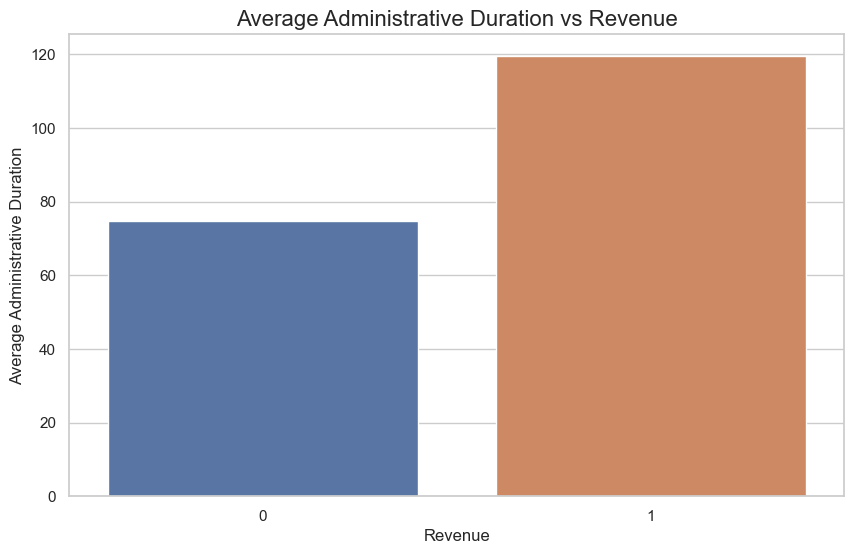

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='Revenue', y='Administrative_Duration', ci=None)
plt.title('Average Administrative Duration vs Revenue', fontsize=16)
plt.ylabel('Average Administrative Duration', fontsize=12)
plt.xlabel('Revenue', fontsize=12)
plt.show()

### Observation:
- Higher Administrative Duration often leads to a conversion.

=> **Hypothesis**: To buy a product a user may be required to log in / register an account.

## Bounce Rate vs Revenue

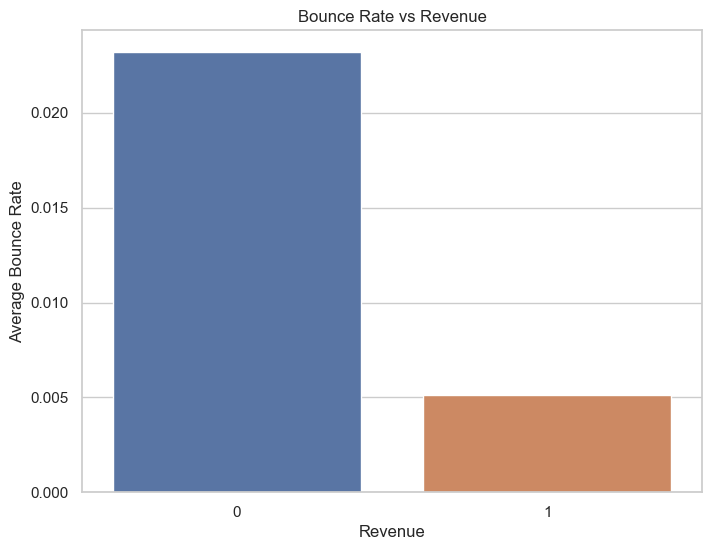

In [14]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Revenue', y='BounceRates', data=df, ci=None, estimator='mean')
plt.title('Bounce Rate vs Revenue')
plt.ylabel('Average Bounce Rate')
plt.xlabel('Revenue')
plt.show()

### Observation
- Bounce Rate highly correlate with not buying.

=> **Hypothesis**: The user might have misclicked the page and have no intention of buying

## Exit Rate vs Revenue

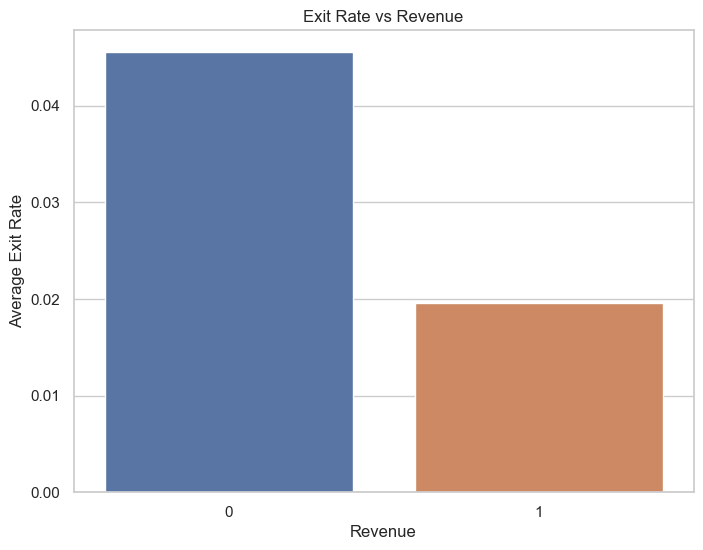

In [15]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Revenue', y='ExitRates', data=df, ci=None, estimator='mean')
plt.title('Exit Rate vs Revenue')
plt.ylabel('Average Exit Rate')
plt.xlabel('Revenue')
plt.show()

### Observation
- Similar to Bounce Rate, but exit rate means if the user has completely close all tabs related to the e-commerce platform. Therefore, we can see that it does not affect transaction decision as much as Bounce Rate.

## Exit Rate vs Bounce Rate

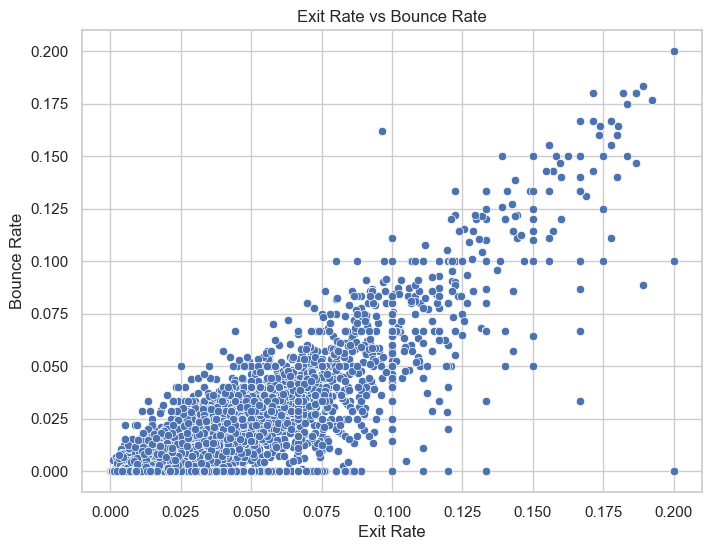

In [16]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='ExitRates', y='BounceRates', data=df)
plt.title('Exit Rate vs Bounce Rate')
plt.ylabel('Bounce Rate')
plt.xlabel('Exit Rate')
plt.show()

### Observation
- BounceRates & ExitRates (0.91): Higher BounceRates (users leaving immediately) are correlate to higher ExitRates (users leaving from specific pages). Additionally, thay are highly interdependent because a "bounce" is a special type of "exit".

## Page Values vs VisitorType

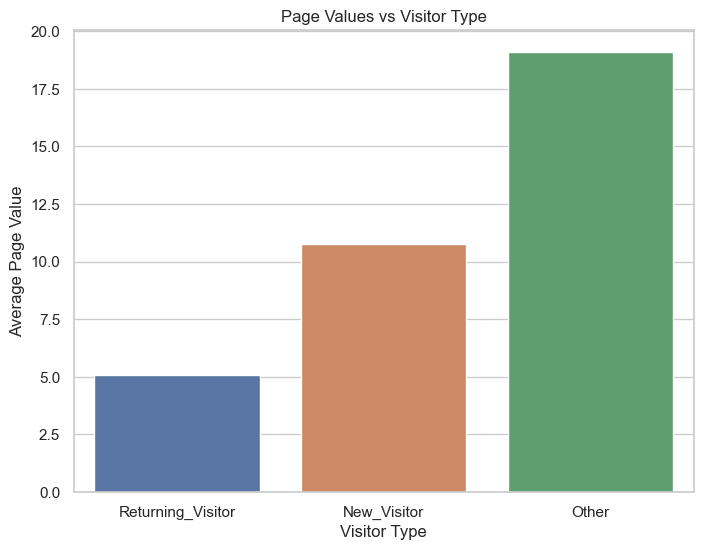

In [17]:
plt.figure(figsize=(8, 6))
sns.barplot(x='VisitorType', y='PageValues', data=df, ci=None, estimator='mean')
plt.title('Page Values vs Visitor Type')
plt.ylabel('Average Page Value')
plt.xlabel('Visitor Type')
plt.show()

### Observation
- Page Values for Others and New Visitors may be higher because they go straight to the high value page through ads and links whereas Returning Visitors tend to check many pages.

## Revenue by Month

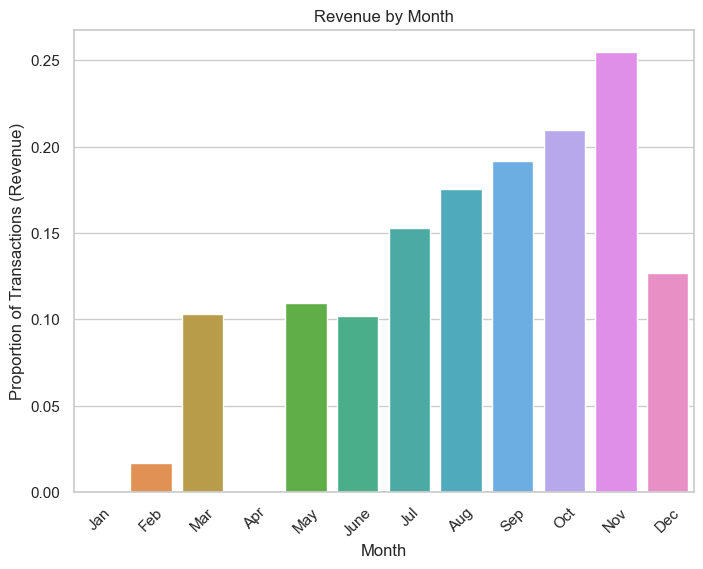

In [18]:
# Grouping data by month to calculate the count of instances

plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='Revenue', data=df, ci=None)
plt.title('Revenue by Month')
plt.ylabel('Proportion of Transactions (Revenue)')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

## Special Day by Visitor Type

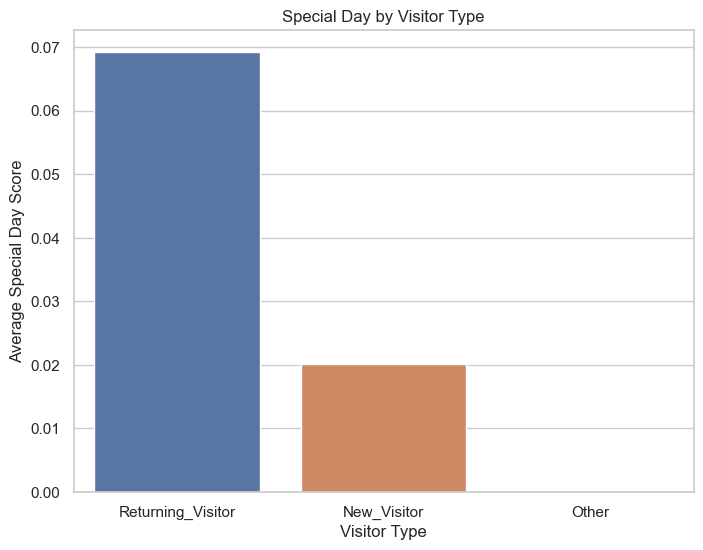

In [19]:
plt.figure(figsize=(8, 6))
sns.barplot(x='VisitorType', y='SpecialDay', data=df, ci=None)
plt.title('Special Day by Visitor Type')
plt.ylabel('Average Special Day Score')
plt.xlabel('Visitor Type')
plt.show()

### Observation
- On Special Day returning visitors are the primary visitor due to familiarity with the platform, as for New Visitors, they probably only discover the site from advertisement campaigns.

## Special Day by month

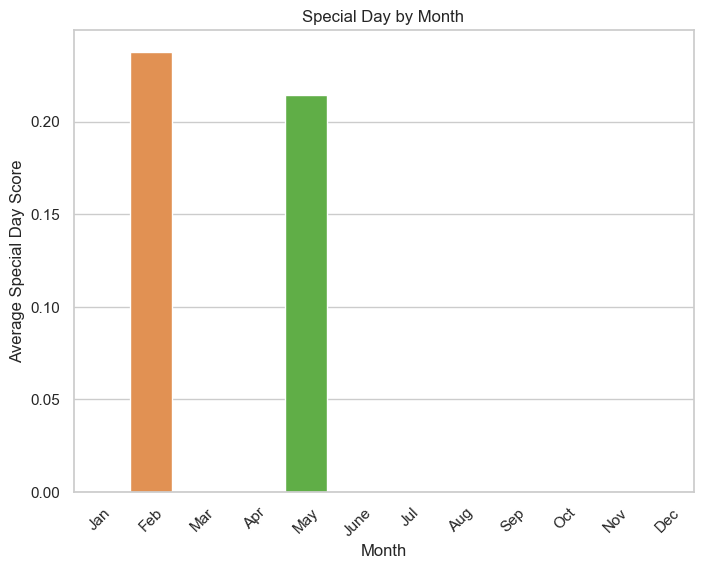

In [20]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Month', y='SpecialDay', data=df, ci=None, estimator='mean')
plt.title('Special Day by Month')
plt.ylabel('Average Special Day Score')
plt.xlabel('Month')
plt.xticks(rotation=45)
plt.show()

### Observation
- SpecialDay only recognize Women's Day and Mother's Day which may lead to poor model evaluation, tried to feature engineer for other special days in the year (Christmas, New Year) but is impossible because we don't know the specific day (before or after that day) => consider dropping.

# Target Revenue, 

## Notes
- Consider remove Other from VisitorType
- No Informational_Duration for 0 Revenue 
- No Page_Values for 0 Revenue 
- Special Day is from 0 to 1 not 0 AND 1
- PageValues: a metric that measures how important a page is to a website's revenue
- Sum lai roi tinh => better for biased dataset


## Special observations
- Inspect month with Revenue deeper (Maybe correlate with Special Day), e.g Nov, Dec have higher buy rates because Christmas & Black Friday & Cyber Monday, March: Women's Day
- SpecialDay only recognize Women's Day and Mother's Day which may lead to poor model evaluation, tried to feature engineer for other special days in the year (Christmas, New Year) but is impossible because we don't know the specific day (before or after that day) => consider dropping.
- Exit rate and BounceRate often leads to no transaction
- Other might be Customers using Incognito mode or have technical issues with browser or even accidental visit and the site have not finished identifying the user
- Page Values for Others and New Visitors may be higher because they go straight to the high value page through ads and links whereas Returning Visitors tend to check many pages.
- On Special Day returning visitors are the primary visitor due to familiarity with the platform, as for New Visitors, they probably only discover the site from advertisement campaigns.
- OS 1,2,3 and Browser 1,2 have the most entries => developers should focus on these OS and Browsers
- Administrative vs Revenue
- The higher the total duration spent on the app the higher chance they will buy sth